# Reshaping Data

Today, we'll begin reshaping data.  We'll  cover:
- filtering
- applying a function to all rows
- what is tidy data
- reshaping data into tidy data

First some setup:

````{margin}
```{tip}
I used `set_theme` to change both the fond size and the color palette.
Seaborn has a [detailed guide](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial)
for choosing colors. The `colorblind` palette uses colors that are distinguishable under most common
forms of color blindness.
```
````

In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(font_scale=2, palette='colorblind')
arabica_data_url = 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv'

## Cleaning Data
This week, we'll be cleaning data.

Cleaning data is labor intensive and requires making subjective choices.  
We'll focus on, and assess you on, manipulating data correctly, making reasonable
choices, and documenting the choices you make carefully.


We'll focus on the programming tools that get used in cleaning data in class

this week:
- reshaping data
- handling missing or incorrect values
- changing the representation of information

## Tidy Data

Read in the three csv files described below and store them in a list of DataFrames.

In [2]:
url_base = 'https://raw.githubusercontent.com/rhodyprog4ds/rhodyds/main/data/'

datasets = ['study_a.csv','study_b.csv','study_c.csv']

In [3]:
df_list = [pd.read_csv(url_base + file,na_values= '') for file in datasets]

In [4]:
df_list[0]

,name,treatmenta,treatmentb
0,John Smith,-,2
1,Jane Doe,16,11
2,Mary Johnson,3,1


In [5]:
df_list[1]

,intervention,John Smith,Jane Doe,Mary Johnson
0,treatmenta,-,16,3
1,treatmentb,2,11,1


In [6]:
df_list[2]

,person,treatment,result
0,John Smith,a,-
1,Jane Doe,a,16
2,Mary Johnson,a,3
3,John Smith,b,2
4,Jane Doe,b,11
5,Mary Johnson,b,1


These three all show the same data, but let's say we have two goals:
- find the average  effect per person across treatments
- find the average effect per treatment across people

This works differently for these three versions.

In [7]:
df_list[0].mean()

/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


treatmenta   -54.333333
treatmentb     4.666667
dtype: float64

we get the average per treatment, but to get the average per person, we have to go across rows, which we can do here, but doesn't work as well with plotting

In [8]:
df_list[0].mean(axis=1)

/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


0     2.0
1    11.0
2     1.0
dtype: float64

and this is not well labeled.

Let's try the next one.

In [9]:
df_list[1].mean()

/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


John Smith      -1.0
Jane Doe        13.5
Mary Johnson     2.0
dtype: float64

Now we get the average per person, but what about per treatment? again we have to go across rows instead.

In [10]:
df_list[1].mean(axis=1)

/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


0    9.5
1    6.0
dtype: float64

For the third one, however, we can use groupby

In [11]:
df_list[2].groupby('person').mean()

/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,result
person,
Jane Doe,805.5
John Smith,-1.0
Mary Johnson,15.5


In [12]:
df_list[2].groupby('treatment').mean()

/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,result
treatment,
a,-54.333333
b,703.666667


The original [Tidy Data](https://www.jstatsoft.org/article/view/v059i10) paper is worth reading to build a deeper understanding of these ideas.  

## Tidying Data


Let's reshape the first one to match the tidy one. First, we
will save it to a DataFrame, this makes things easier to read
and enables us to use the built in help in jupyter, because it can't check types too many levels into a data structure.

In [13]:
treat_df = df_list[0]

Let's look at it again, so we can see

In [14]:
treat_df.head()

,name,treatmenta,treatmentb
0,John Smith,-,2
1,Jane Doe,16,11
2,Mary Johnson,3,1


```{admonition} Correction
I fixed the three data files so the spaces can be removed. You will need to
```

In [15]:
treat_df.melt(value_vars = ['treatmenta','treatmentb'],
             id_vars = ['name'],
             value_name = 'result', var_name = 'treatment' )

,name,treatment,result
0,John Smith,treatmenta,-
1,Jane Doe,treatmenta,16
2,Mary Johnson,treatmenta,3
3,John Smith,treatmentb,2
4,Jane Doe,treatmentb,11
5,Mary Johnson,treatmentb,1


In [16]:
tidy_treat_df = treat_df.melt(value_vars = ['treatmenta','treatmentb'],
             id_vars = ['name'],
             value_name = 'result', var_name = 'treatment' )

In [17]:
tidy_treat_df.groupby('name').mean()

/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
name
Jane Doe
John Smith
Mary Johnson


## Filtering Data by a column

Let's go back to the coffee dataset

In [18]:
coffee_df = pd.read_csv(arabica_data_url, index_col = 0)
coffee_df.head()

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


Recall on Friday we computed the total number of bags per country.

In [19]:
# compute total bags per country
bag_total_df = coffee_df.groupby('Country.of.Origin')['Number.of.Bags'].sum()

We can subset this to get only the countries with over 15000 using a boolean mask:

In [20]:
bag_total_df[bag_total_df>15000]

Country.of.Origin
Brazil       30534
Colombia     41204
Guatemala    36868
Mexico       24140
Name: Number.of.Bags, dtype: int64

what we put in the `[]` has to be the same length and each element has to be boolean

In [21]:
len(bag_total_df>15000)

36

In [22]:
mask = bag_total_df>15000
type(mask[0])

numpy.bool_

## Augmenting a dataset

We want the names of the countries as a list, so we extract the index of that series and then cast it to a list.

In [23]:
high_prod_countries =  list(bag_total_df[bag_total_df>15000].index)

Next we want to be able to check if a country is in this list, so we'll make a lambda that can do that

In [24]:
high_prod = lambda c: c in high_prod_countries

Recall, the `lambda` keyword makes a function

In [25]:
type(high_prod)

function

We can test it

In [26]:
high_prod('Mexico'), high_prod('Ethiopa')

(True, False)

Now, we can apply that lambda function to each country in our whole coffee data frame. and save that to a new DataFrame.

In [27]:
coffee_df['high_production'] = coffee_df['Country.of.Origin'].apply(high_prod)

In [28]:
coffee_df.head()

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,high_production
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,False
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,False
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0,True
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0,False
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,False


Finally, we can filter the whole data frame using that new column.

In [29]:
high_prod_coffee_df = coffee_df[coffee_df['high_production']]

```{admonition} Question from class
How can we get the ones not on that list?
```

In [30]:
low_prod_coffee_df = coffee_df[coffee_df['high_production']==False]

````{admonition} Try it Yourself

Replace the FIXMEs in the excerpt below to reshape the data to have a value column with the value of the score
and a Score column that indicates which score is in that . Keep the color and country as values

```
scores_of_interest = ['Balance','Aroma','Body','Aftertaste']
attrs_of_interest = ['Country.of.Origin','Color']
high_prod_coffee_df_melted = high_prod_coffee_df.melt(
        id_vars = FIXME,
        value_vars = FIXME,
        value_name = 'Value',
        var_name = 'Score')
```

so that it looks like the following
````

In [31]:
high_prod_coffee_df_melted = high_prod_coffee_df.melt(
        id_vars = ['Country.of.Origin','Color'],
        value_vars = ['Balance','Aroma','Body','Aftertaste'],
        value_name = 'Value',
        var_name = 'Score')

high_prod_coffee_df_melted.head()

,Country.of.Origin,Color,Score,Value
0,Guatemala,NaN,Balance,8.42
1,Brazil,Bluish-Green,Balance,8.33
2,Mexico,Green,Balance,8.17
3,Brazil,Green,Balance,8.00
4,Brazil,Green,Balance,8.00


```{admonition} Try it Yourself
Plot the distribution of each score on a separate subplot and use a different color for each country. Use a kde for the distributions.
```

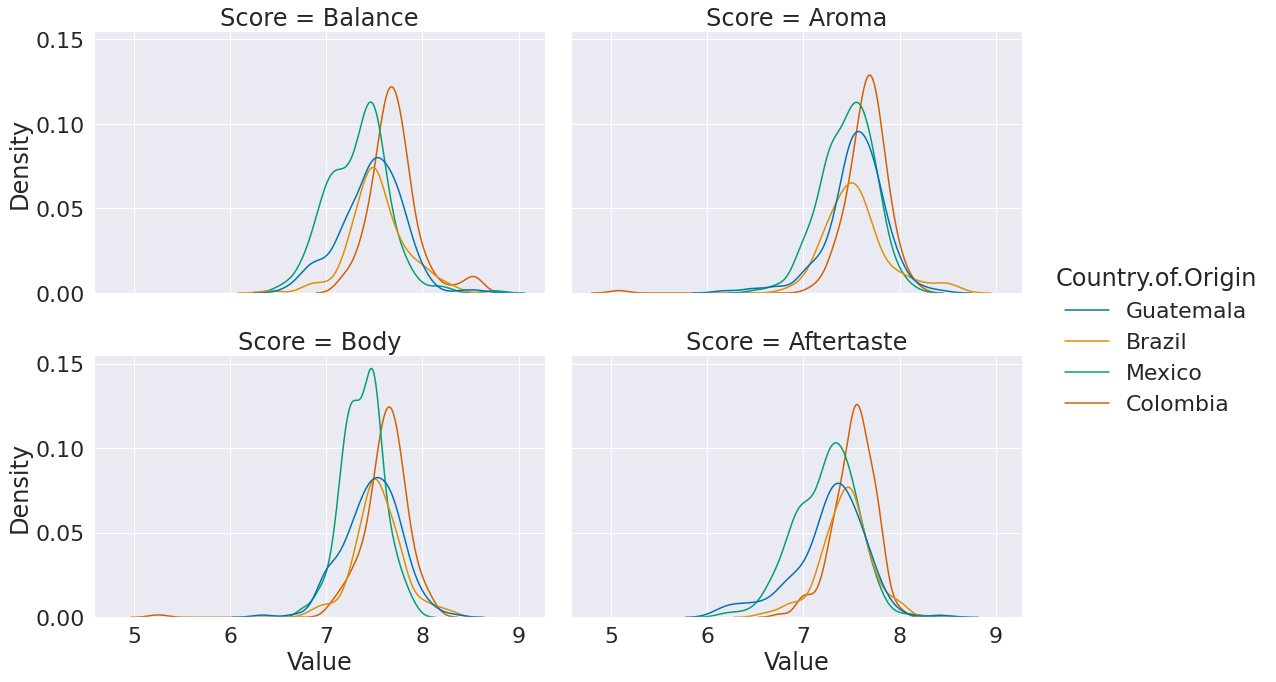

In [32]:
sns.displot(data = high_prod_coffee_df_melted, x ='Value', hue = 'Country.of.Origin',
            col = 'Score',col_wrap =2, aspect=1.5, kind = 'kde')